In [6]:
#Author: Tahís Ahtty
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
nltk.download('stopwords')
import string
import re
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [3]:
#import spacy
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [4]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [8]:
import tempfile
##Cambiar al path correspondiente en su directorio
articles_extendido=pd.read_csv("C:/Users/User/Thalia/Espol/2018-2S/Mineria/noticiasVenezuela/noticias_Venezuela_extendido.csv")
articles_extendido

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Montaner y la organización...,Sociedad,2018-04-09,4
8,2018-04-10,2018-04-10T00:00:00,https://www.eluniverso.com/noticias/2018/04/10...,El tema Venezuela sigue presente en la región,El tema Venezuela sigue siendo frecuente entre...,Politica,2018-04-10,4
9,2018-04-10,2018-04-10T07:17:00,https://www.eluniverso.com/noticias/2018/04/10...,España detiene a dos venezolanos por pedido de...,La Fiscalía General anunció que España apresó ...,Represion,2018-04-10,4


# LDA opción 1
## LDA con tópicos a toda la data

In [24]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "c:\users\user\appdata\local\temp" will be used to save temporary dictionary and corpus.


In [25]:
noticias = articles_extendido
corpus=[]
a=[]
for i in range(len(noticias['texto'])):
        a=noticias['texto'][i]
        corpus.append(a)

In [26]:
noticias.texto=noticias['texto'].apply(lambda x:str(x))
noticias.texto.head(20)

0     Ginebra -Naciones Unidas dijo el martes que bu...
1     Peinados a cambio de publicidad, un nuevo códi...
2     Washington -Colombia pidió el miércoles a los ...
3     El presidente de Venezuela, Nicolás Maduro, re...
4     Caracas -Con cuidado, el hombre escoge las hoj...
5     El gobierno de Sebastián Piñera anunció este l...
6     El Tribunal Supremo de Justicia de Venezuela, ...
7     El cantante Ricardo Montaner y la organización...
8     El tema Venezuela sigue siendo frecuente entre...
9     La Fiscalía General anunció que España apresó ...
10    España y Venezuela mostraron su disposición a ...
11    Los tribunales militares venezolanos están vio...
12    El gobierno venezolano planea elevar a un mill...
13    La crisis venezolana también estará “en el top...
14    El vicepresidente de Estados Unidos, Mike Penc...
15    Ecuador exhortó este sábado al gobierno de Nic...
16    El presidente venezolano, Nicolás Maduro, reci...
17    El consulado de Chile en Caracas amaneció 

In [27]:
from nltk.corpus import stopwords
from string import punctuation
import os

# remove common words and tokenize
list1 = ['Venezuela','Maduro','venezolano','venezolanos','venezonlanas']
stoplist = stopwords.words('spanish') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
print(dictionary)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':


Dictionary(10418 unique tokens: [u'detenci\xf3n', u'1,8', u'1,9', u'1,6', u'bloqueos']...)


In [28]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)
from gensim import corpora, models, similarities
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus] 

In [29]:
total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] 
lda.show_topics(total_topics,5)
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
df_lda

(48, 5)
(5, 48)


,20,anunció,año,años,"años,",bolívares,caracas,colombia,"colombia,",crisis,...,perú,presidente,según,situación,también,tras,tres,unidos,venezuela,"venezuela,"
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001533,0.001722,0.000000,0.000000,0.004878,...,0.000000,0.003996,0.002578,0.000000,0.001795,0.000000,0.000000,0.000000,0.004977,0.001891
1,0.000000,0.000000,0.001563,0.000000,0.000000,0.000000,0.002499,0.000000,0.000000,0.004322,...,0.001923,0.003451,0.002107,0.000000,0.000000,0.001659,0.001581,0.000000,0.005367,0.002075
2,0.000000,0.002103,0.000000,0.000000,0.000000,0.000000,0.002877,0.001581,0.001690,0.003411,...,0.000000,0.005650,0.002169,0.000000,0.001668,0.001755,0.000000,0.000000,0.004250,0.003391
3,0.000000,0.000000,0.000000,0.001849,0.000000,0.000000,0.002166,0.000000,0.001681,0.003920,...,0.000000,0.006202,0.002237,0.000000,0.000000,0.001912,0.000000,0.001644,0.009571,0.002868
4,0.001489,0.000000,0.000000,0.000000,0.001504,0.000000,0.000000,0.001728,0.000000,0.002680,...,0.000000,0.002906,0.002241,0.001727,0.001840,0.000000,0.000000,0.000000,0.004801,0.002235


----------------Cluster map de correlaciones cruzadas entre el top 50 de palabras--------------


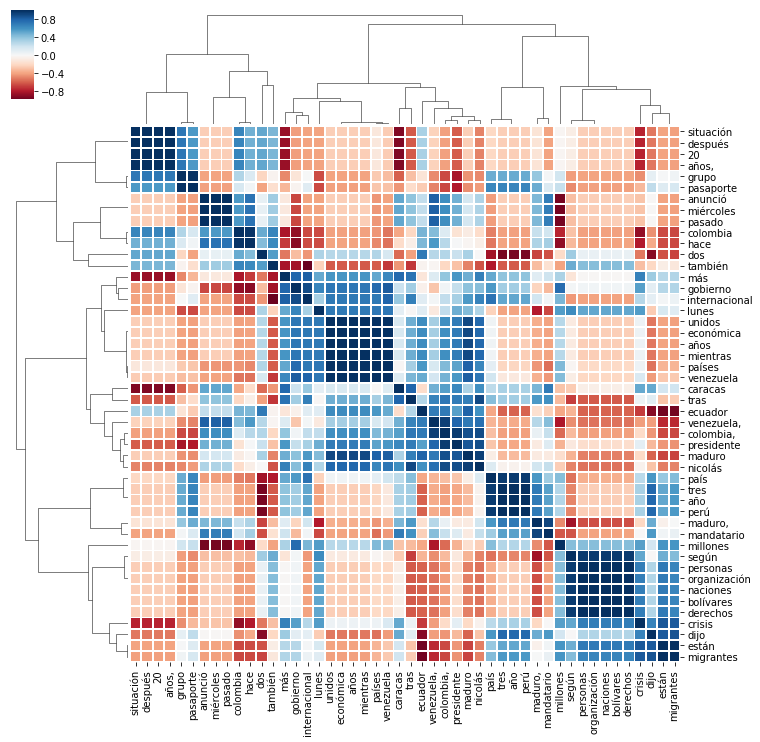

In [35]:
print('----------------Cluster map de correlaciones cruzadas entre el top 50 de palabras--------------')
g=sb.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [32]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

C:\Users\User\Anaconda2\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
0      35.710926        1       1    9.996505 -222.929092
1      34.013714        1       2   54.630600   55.189125
3      10.157491        1       3  180.913223  -32.649052
4      10.059021        1       4  -14.773765  -76.314064
2      10.058851        1       5  157.431244 -179.040527, topic_info=      Category      Freq           Term     Total  loglift  logprob
term                                                               
2856   Default  1.000000         maduro  1.000000  30.0000  30.0000
5481   Default  1.000000      venezuela  1.000000  29.0000  29.0000
1888   Default  1.000000     presidente  1.000000  28.0000  28.0000
8467   Default  1.000000        nicolás  1.000000  27.0000  27.0000
452    Default  1.000000       gobierno  1.000000  26.0000  26.0000
7070   Default  0.000000         países  0.000000  25.0000  25.0000
9390   Default  0.000000        ecuador  0.000000  24.0000  24.0000
2602   Default  0.000000     venezuela,  0.000000  23.0000  23.0000
4221   Default  1.000000           país  1.000000  22.0000  22.0000
8763   Default  1.000000            más  1.000000  21.0000  21.0000
5564   Default  0.000000            dos  0.000000  20.0000  20.0000
1959   Default  0.000000        caracas  0.000000  19.0000  19.0000
8586   Default  1.000000         crisis  1.000000  18.0000  18.0000
10132  Default  1.000000           dijo  1.000000  17.0000  17.0000
3425   Default  0.000000        anunció  0.000000  16.0000  16.0000
8344   Default  0.000000        maduro,  0.000000  15.0000  15.0000
5237   Default  0.000000          según  0.000000  14.0000  14.0000
8884   Default  0.000000      miércoles  0.000000  13.0000  13.0000
9373   Default  0.000000       colombia  0.000000  12.0000  12.0000
2389   Default  0.000000        también  0.000000  11.0000  11.0000
9413   Default  0.000000     mandatario  0.000000  10.0000  10.0000
3641   Default  0.000000         unidos  0.000000   9.0000   9.0000
10043  Default  0.000000        después  0.000000   8.0000   8.0000
8946   Default  0.000000      situación  0.000000   7.0000   7.0000
4186   Default  0.000000         pasado  0.000000   6.0000   6.0000
9989   Default  0.000000           tras  0.000000   5.0000   5.0000
2465   Default  0.000000      económica  0.000000   4.0000   4.0000
3784   Default  0.000000      colombia,  0.000000   3.0000   3.0000
3416   Default  0.000000           años  0.000000   2.0000   2.0000
8837   Default  0.000000           hace  0.000000   1.0000   1.0000
...        ...       ...            ...       ...      ...      ...
7487    Topic5  0.036753            mil  0.189821   0.6548  -6.7530
4371    Topic5  0.039210       frontera  0.208074   0.6278  -6.6883
1959    Topic5  0.090565        caracas  0.658914   0.3122  -5.8512
9413    Topic5  0.059433     mandatario  0.393511   0.4064  -6.2724
8111    Topic5  0.039289       decisión  0.228888   0.5344  -6.6863
6495    Topic5  0.033086        general  0.180669   0.5992  -6.8581
9390    Topic5  0.070321        ecuador  0.548822   0.2420  -6.1042
4186    Topic5  0.054594         pasado  0.378003   0.3617  -6.3573
9373    Topic5  0.049778       colombia  0.330364   0.4041  -6.4497
10132   Topic5  0.136834           dijo  1.533762  -0.1200  -5.4385
3641    Topic5  0.040611         unidos  0.247106   0.4909  -6.6532
8837    Topic5  0.055425           hace  0.404966   0.3079  -6.3422
8763    Topic5  0.111204            más  1.192794  -0.0760  -5.6459
8344    Topic5  0.074712        maduro,  0.649635   0.1340  -6.0436
5481    Topic5  0.133797      venezuela  1.716902  -0.2552  -5.4609
8586    Topic5  0.107378         crisis  1.321721  -0.2136  -5.6809
4221    Topic5  0.110171           país  1.386802  -0.2360  -5.6552
3784    Topic5  0.053220      colombia,  0.408004   0.2599  -6.3828
10043   Topic5  0.039599        después  0.246775   0.4671  -6.6784
3970    Topic5 

## LDA con tópicos por categoría

In [39]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

noticias['noticias_punct'] = noticias['texto'].apply(lambda x: remove_punct(x))
sid = SentimentIntensityAnalyzer() 
noticias["sentimiento"] = noticias["texto"].apply(lambda x: sid.polarity_scores(x)["compound"])
noticias.head(20)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,noticias_punct,sentimiento
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,Ginebra Naciones Unidas dijo el martes que bus...,-0.9766
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,Peinados a cambio de publicidad un nuevo códig...,-0.8591
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,Washington Colombia pidió el miércoles a los e...,-0.9231
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,El presidente de Venezuela Nicolás Maduro rest...,0.0000
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,Caracas Con cuidado el hombre escoge las hojas...,0.0000
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,El gobierno de Sebastián Piñera anunció este l...,-0.8957
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,El Tribunal Supremo de Justicia de Venezuela c...,0.5574
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Montaner y la organización...,Sociedad,2018-04-09,4,El cantante Ricardo Montaner y la organización...,-0.9118
8,2018-04-10,2018-04-10T00:00:00,https://www.eluniverso.com/noticias/2018/04/10...,El tema Venezuela sigue presente en la región,El tema Venezuela sigue siendo frecuente entre...,Politica,2018-04-10,4,El tema Venezuela sigue siendo frecuente entre...,-0.9186
9,2018-04-10,2018-04-10T07:17:00,https://www.eluniverso.com/noticias/2018/04/10...,España detiene a dos venezolanos por pedido de...,La Fiscalía General anunció que España apresó ...,Represion,2018-04-10,4,La Fiscalía General anunció que España apresó ...,-0.2960


In [41]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

noticias['noticias_tokenized'] =  noticias['noticias_punct'].apply(lambda x: tokenization(x.lower()))
noticias.head(15)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,noticias_punct,sentimiento,noticias_tokenized
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,Ginebra Naciones Unidas dijo el martes que bus...,-0.9766,"[ginebra, naciones, unidas, dijo, el, martes, ..."
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,Peinados a cambio de publicidad un nuevo códig...,-0.8591,"[peinados, a, cambio, de, publicidad, un, nuev..."
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,Washington Colombia pidió el miércoles a los e...,-0.9231,"[washington, colombia, pidi, el, mi, rcoles, a..."
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,El presidente de Venezuela Nicolás Maduro rest...,0.0000,"[el, presidente, de, venezuela, nicol, s, madu..."
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,Caracas Con cuidado el hombre escoge las hojas...,0.0000,"[caracas, con, cuidado, el, hombre, escoge, la..."
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,El gobierno de Sebastián Piñera anunció este l...,-0.8957,"[el, gobierno, de, sebasti, n, pi, era, anunci..."
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,El Tribunal Supremo de Justicia de Venezuela c...,0.5574,"[el, tribunal, supremo, de, justicia, de, vene..."
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Montaner y la organización...,Sociedad,2018-04-09,4,El cantante Ricardo Montaner y la organización...,-0.9118,"[el, cantante, ricardo, montaner, y, la, organ..."
8,2018-04-10,2018-04-10T00:00:00,https://www.eluniverso.com/noticias/2018/04/10...,El tema Venezuela sigue presente en la región,El tema Venezuela sigue siendo frecuente entre...,Politica,2018-04-10,4,El tema Venezuela sigue siendo frecuente entre...,-0.9186,"[el, tema, venezuela, sigue, siendo, frecuente..."
9,2018-04-10,2018-04-10T07:17:00,https://www.eluniverso.com/noticias/2018/04/10...,España detiene a dos venezolanos por pedido de...,La Fiscalía General anunció que España apresó ...,Represion,2018-04-10,4,La Fiscalía General anunció que España apresó ...,-0.2960,"[la, fiscal, a, general, anunci, que, espa, a,..."


In [45]:
stopword = nltk.corpus.stopwords.words('spanish')
stopword.extend(['Venezuela','Maduro','venezolano','venezolanos','venezonlanas'])
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
noticias['noticia_nonstop'] = noticias['noticias_tokenized'].apply(lambda x: remove_stopwords(x))
noticias.head(10)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,noticias_punct,sentimiento,noticias_tokenized,noticia_nonstop
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,Ginebra Naciones Unidas dijo el martes que bus...,-0.9766,"[ginebra, naciones, unidas, dijo, el, martes, ...","[ginebra, naciones, unidas, dijo, martes, busc..."
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,Peinados a cambio de publicidad un nuevo códig...,-0.8591,"[peinados, a, cambio, de, publicidad, un, nuev...","[peinados, cambio, publicidad, nuevo, c, digo,..."
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,Washington Colombia pidió el miércoles a los e...,-0.9231,"[washington, colombia, pidi, el, mi, rcoles, a...","[washington, colombia, pidi, rcoles, miembros,..."
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,El presidente de Venezuela Nicolás Maduro rest...,0.0000,"[el, presidente, de, venezuela, nicol, s, madu...","[presidente, venezuela, nicol, s, maduro, rest..."
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,Caracas Con cuidado el hombre escoge las hojas...,0.0000,"[caracas, con, cuidado, el, hombre, escoge, la...","[caracas, cuidado, hombre, escoge, hojas, verd..."
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,El gobierno de Sebastián Piñera anunció este l...,-0.8957,"[el, gobierno, de, sebasti, n, pi, era, anunci...","[gobierno, sebasti, n, pi, anunci, lunes, otor..."
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,El Tribunal Supremo de Justicia de Venezuela c...,0.5574,"[el, tribunal, supremo, de, justicia, de, vene...","[tribunal, supremo, justicia, venezuela, cesad..."
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Montaner y la organización...,Sociedad,2018-04-09,4,El cantante Ricardo Montaner y la organización...,-0.9118,"[el, cantante, ricardo, montaner, y, la, organ...","[cantante, ricardo, montaner, organizaci, n, h..."
8,2018-04-10,2018-04-10T00:00:00,https://www.eluniverso.com/noticias/2018/04/10...,El tema Venezuela sigue presente en la región,El tema Venezuela sigue siendo frecuente entre...,Politica,2018-04-10,4,El tema Venezuela sigue siendo frecuente entre...,-0.9186,"[el, tema, venezuela, sigue, siendo, frecuente...","[tema, venezuela, sigue, siendo, frecuente, l,..."
9,2018-04-10,2018-04-10T07:17:00,https://www.eluniverso.com/noticias/2018/04/10...,España detiene a dos venezolanos por pedido de...,La Fiscalía General anunció que España apresó ...,Represion,2018-04-10,4,La Fiscalía General anunció que España apresó ...,-0.2960,"[la, fiscal, a, general, anunci, que, espa, a,...","[fiscal, general, anunci, espa, apres, dos, so..."


In [46]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

noticias['noticia_stemmed'] = noticias['noticia_nonstop'].apply(lambda x: stemming(x))
noticias.head(10)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,noticias_punct,sentimiento,noticias_tokenized,noticia_nonstop,noticia_stemmed
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,Ginebra Naciones Unidas dijo el martes que bus...,-0.9766,"[ginebra, naciones, unidas, dijo, el, martes, ...","[ginebra, naciones, unidas, dijo, martes, busc...","[ginebra, nacion, unida, dijo, mart, busca, ob..."
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,Peinados a cambio de publicidad un nuevo códig...,-0.8591,"[peinados, a, cambio, de, publicidad, un, nuev...","[peinados, cambio, publicidad, nuevo, c, digo,...","[peinado, cambio, publicidad, nuevo, c, digo, ..."
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,Washington Colombia pidió el miércoles a los e...,-0.9231,"[washington, colombia, pidi, el, mi, rcoles, a...","[washington, colombia, pidi, rcoles, miembros,...","[washington, colombia, pidi, rcole, miembro, o..."
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,El presidente de Venezuela Nicolás Maduro rest...,0.0000,"[el, presidente, de, venezuela, nicol, s, madu...","[presidente, venezuela, nicol, s, maduro, rest...","[president, venezuela, nicol, s, maduro, rest,..."
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,Caracas Con cuidado el hombre escoge las hojas...,0.0000,"[caracas, con, cuidado, el, hombre, escoge, la...","[caracas, cuidado, hombre, escoge, hojas, verd...","[caraca, cuidado, hombr, escog, hoja, verd, ta..."
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,El gobierno de Sebastián Piñera anunció este l...,-0.8957,"[el, gobierno, de, sebasti, n, pi, era, anunci...","[gobierno, sebasti, n, pi, anunci, lunes, otor...","[gobierno, sebasti, n, pi, anunci, lune, otorg..."
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,El Tribunal Supremo de Justicia de Venezuela c...,0.5574,"[el, tribunal, supremo, de, justicia, de, vene...","[tribunal, supremo, justicia, venezuela, cesad...","[tribun, supremo, justicia, venezuela, cesado,..."
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Montaner y la organización...,Sociedad,2018-04-09,4,El cantante Ricardo Montaner y la organización...,-0.9118,"[el, cantante, ricardo, montaner, y, la, organ...","[cantante, ricardo, montaner, organizaci, n, h...","[cantant, ricardo, montan, organizaci, n, huma..."
8,2018-04-10,2018-04-10T00:00:00,https://www.eluniverso.com/noticias/2018/04/10...,El tema Venezuela sigue presente en la región,El tema Venezuela sigue siendo frecuente entre...,Politica,2018-04-10,4,El tema Venezuela sigue siendo frecuente entre...,-0.9186,"[el, tema, venezuela, sigue, siendo, frecuente...","[tema, venezuela, sigue, siendo, frecuente, l,...","[tema, venezuela, sigu, siendo, frecuent, l, d..."
9,2018-04-10,2018-04-10T07:17:00,https://www.eluniverso.com/noticias/2018/04/10...,E

In [49]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text if "ja" not in word]
    return text

    
noticias['noticia_lemmatized'] = noticias['noticia_nonstop'].apply(lambda x: lemmatizer(x))
noticias.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,noticias_punct,sentimiento,noticias_tokenized,noticia_nonstop,noticia_stemmed,noticia_lemmatized
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,Ginebra Naciones Unidas dijo el martes que bus...,-0.9766,"[ginebra, naciones, unidas, dijo, el, martes, ...","[ginebra, naciones, unidas, dijo, martes, busc...","[ginebra, nacion, unida, dijo, mart, busca, ob...","[ginebra, naciones, unidas, dijo, martes, busc..."
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,Peinados a cambio de publicidad un nuevo códig...,-0.8591,"[peinados, a, cambio, de, publicidad, un, nuev...","[peinados, cambio, publicidad, nuevo, c, digo,...","[peinado, cambio, publicidad, nuevo, c, digo, ...","[peinados, cambio, publicidad, nuevo, c, digo,..."
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,Washington Colombia pidió el miércoles a los e...,-0.9231,"[washington, colombia, pidi, el, mi, rcoles, a...","[washington, colombia, pidi, rcoles, miembros,...","[washington, colombia, pidi, rcole, miembro, o...","[washington, colombia, pidi, rcoles, miembros,..."
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,El presidente de Venezuela Nicolás Maduro rest...,0.0000,"[el, presidente, de, venezuela, nicol, s, madu...","[presidente, venezuela, nicol, s, maduro, rest...","[president, venezuela, nicol, s, maduro, rest,...","[presidente, venezuela, nicol, s, maduro, rest..."
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,Caracas Con cuidado el hombre escoge las hojas...,0.0000,"[caracas, con, cuidado, el, hombre, escoge, la...","[caracas, cuidado, hombre, escoge, hojas, verd...","[caraca, cuidado, hombr, escog, hoja, verd, ta...","[caracas, cuidado, hombre, escoge, verdes, tam..."
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,El gobierno de Sebastián Piñera anunció este l...,-0.8957,"[el, gobierno, de, sebasti, n, pi, era, anunci...","[gobierno, sebasti, n, pi, anunci, lunes, otor...","[gobierno, sebasti, n, pi, anunci, lune, otorg...","[gobierno, sebasti, n, pi, anunci, lunes, otor..."
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,El Tribunal Supremo de Justicia de Venezuela c...,0.5574,"[el, tribunal, supremo, de, justicia, de, vene...","[tribunal, supremo, justicia, venezuela, cesad...","[tribun, supremo, justicia, venezuela, cesado,...","[tribunal, supremo, justicia, venezuela, cesad..."
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Montaner y la organización...,Sociedad,2018-04-09,4,El cantante Ricardo Montaner y la organización...,-0.9118,"[el, cantante, ricardo, montaner, y, la, organ...","[cantante, ricardo, montaner, organizaci, n, h...","[cantant, ricardo, montan, organizaci, n, huma...","[cantante, ricardo, montaner, organizaci, n, h..."
8,2018-04-10,2018-04-10T00:00:00,https://www.eluniverso.com/noti

In [51]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(noticias['stemmed'])
print('{} Número de noticias tienen {} words'.format(countVector.shape[0], countVector.shape[1]))

313 Número de noticias tienen 6458 words


In [52]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aban,abandonado,abandonan,abandonar,abandonara,abandonaron,abarca,abarcan,abarrotado,...,zelaya,zhou,zimbabu,zimbabuens,zimbabw,zona,zonal,zulia,zuliano,zumano
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
corpus=[]
text=[]
for i in range(len(noticias['noticia_lemmatized'])):
    text= ' '.join(noticias['noticia_lemmatized'][i])
    #print(text)
    corpus.append(text)

In [91]:
# remove common words and tokenize
list1 = ['Venezuela','Maduro','venezolano','venezolanos','venezonlanas','venezolana','maduro','an','bol','c','d','dijo','do','est','s','seg','tambi','tras','venezuela','cada','agreg','cr','n','m','p','l','r','tica','rica','ser']
stoplist = stopwords.words('spanish') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)
from gensim import corpora, models, similarities
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus] 

In [92]:
total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] 
lda.show_topics(total_topics,5)
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
df_lda

(55, 5)
(5, 55)


,anunci,asamblea,ayer,brasil,canciller,caracas,chile,colombia,crisis,derechos,...,presidente,rcoles,sanciones,si,situaci,tico,tres,unidos,vares,vez
0,0.000000,0.001887,0.000000,0.000000,0.000000,0.003046,0.000000,0.003539,0.005680,0.000000,...,0.007127,0.0000,0.000000,0.001936,0.000000,0.000000,0.002113,0.002655,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.002586,0.003456,0.000000,0.004214,0.007404,0.000000,...,0.004188,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002066
2,0.001767,0.000000,0.001864,0.002426,0.000000,0.002651,0.000000,0.003879,0.002271,0.002027,...,0.004438,0.0000,0.000000,0.000000,0.001963,0.000000,0.000000,0.000000,0.001784,0.000000
3,0.002328,0.000000,0.000000,0.000000,0.000000,0.003294,0.002204,0.002690,0.006056,0.000000,...,0.005383,0.0000,0.000000,0.000000,0.000000,0.001717,0.000000,0.002162,0.001895,0.001655
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.004125,0.000000,0.003531,0.004169,0.000000,...,0.006543,0.0017,0.001829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


----------------Cluster map de correlaciones cruzadas entre el top 50 de palabras--------------


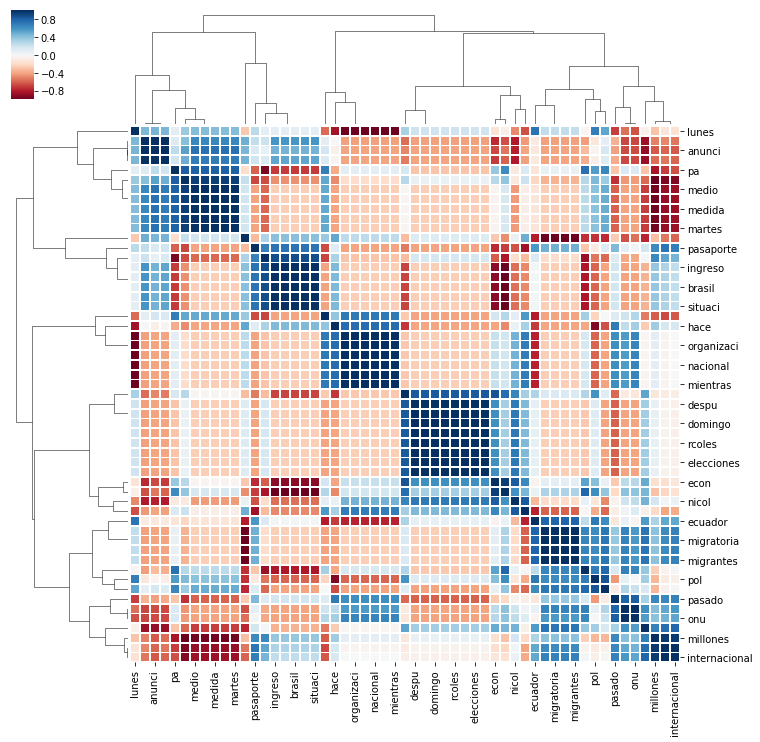

In [93]:
print('----------------Cluster map de correlaciones cruzadas entre el top 50 de palabras--------------')
cm=sb.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [99]:
df_lda.columns.values.tolist()

[u'anunci',
 u'asamblea',
 u'ayer',
 u'brasil',
 u'canciller',
 u'caracas',
 u'chile',
 u'colombia',
 u'crisis',
 u'derechos',
 u'despu',
 u'domingo',
 u'econ',
 u'ecuador',
 u'elecciones',
 u'gobierno',
 u'hace',
 u'humanitaria',
 u'ingreso',
 u'internacional',
 u'lares',
 u'lima',
 u'lunes',
 u'mandatario',
 u'martes',
 u'mayor',
 u'medida',
 u'medidas',
 u'medio',
 u'mica',
 u'mientras',
 u'migrantes',
 u'migratoria',
 u'millones',
 u'nacional',
 u'nicol',
 u'onu',
 u'organizaci',
 u'pa',
 u'parte',
 u'pasado',
 u'pasaporte',
 u'per',
 u'persona',
 u'pol',
 u'presidente',
 u'rcoles',
 u'sanciones',
 u'si',
 u'situaci',
 u'tico',
 u'tres',
 u'unidos',
 u'vares',
 u'vez']

In [149]:
##verificar data completa
noticias.count()

fecha_string          313
fecha                 313
url                   313
titulo                313
texto                 313
categoria             313
fecha_string.1        313
mes                   313
noticias_punct        313
sentimiento           313
noticias_tokenized    313
noticia_nonstop       313
noticia_stemmed       313
noticia_lemmatized    313
noticia_limpia        313
dtype: int64

In [148]:
##revomer palabras que resultan sin significado aun después de todo el proceso anterior
lista_adicional = ['Venezuela','Maduro','venezolano','venezolanos','venezonlanas','venezolana','maduro','an','bol','c','d','dijo','do','est','s','seg','tambi','tras','venezuela','cada','agreg','cr','n','m','p','l','r','tica','rica','ser']

def remover(x,e):
    r = []
    if e in x:
        r = x.remove(e)
        return r
    else:
        return x

for elemento in lista_adicional:
        noticias['noticia_limpia'] = noticias['noticia_lemmatized'].apply(lambda x:remover(x,elemento))
noticias.head(10)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,noticias_punct,sentimiento,noticias_tokenized,noticia_nonstop,noticia_stemmed,noticia_lemmatized,noticia_limpia
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,Ginebra Naciones Unidas dijo el martes que bus...,-0.9766,"[ginebra, naciones, unidas, dijo, el, martes, ...","[ginebra, naciones, unidas, dijo, martes, busc...","[ginebra, nacion, unida, dijo, mart, busca, ob...","[ginebra, naciones, unidas, martes, busca, obt...","[ginebra, naciones, unidas, martes, busca, obt..."
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,Peinados a cambio de publicidad un nuevo códig...,-0.8591,"[peinados, a, cambio, de, publicidad, un, nuev...","[peinados, cambio, publicidad, nuevo, c, digo,...","[peinado, cambio, publicidad, nuevo, c, digo, ...","[peinados, cambio, publicidad, nuevo, digo, mi...","[peinados, cambio, publicidad, nuevo, digo, mi..."
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,Washington Colombia pidió el miércoles a los e...,-0.9231,"[washington, colombia, pidi, el, mi, rcoles, a...","[washington, colombia, pidi, rcoles, miembros,...","[washington, colombia, pidi, rcole, miembro, o...","[washington, colombia, pidi, rcoles, miembros,...","[washington, colombia, pidi, rcoles, miembros,..."
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,El presidente de Venezuela Nicolás Maduro rest...,0.0000,"[el, presidente, de, venezuela, nicol, s, madu...","[presidente, venezuela, nicol, s, maduro, rest...","[president, venezuela, nicol, s, maduro, rest,...","[presidente, nicol, rest, importancia, rcoles,...","[presidente, nicol, rest, importancia, rcoles,..."
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,Caracas Con cuidado el hombre escoge las hojas...,0.0000,"[caracas, con, cuidado, el, hombre, escoge, la...","[caracas, cuidado, hombre, escoge, hojas, verd...","[caraca, cuidado, hombr, escog, hoja, verd, ta...","[caracas, cuidado, hombre, escoge, verdes, tam...","[caracas, cuidado, hombre, escoge, verdes, tam..."
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,El gobierno de Sebastián Piñera anunció este l...,-0.8957,"[el, gobierno, de, sebasti, n, pi, era, anunci...","[gobierno, sebasti, n, pi, anunci, lunes, otor...","[gobierno, sebasti, n, pi, anunci, lune, otorg...","[gobierno, sebasti, pi, anunci, lunes, otorgar...","[gobierno, sebasti, pi, anunci, lunes, otorgar..."
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,El Tribunal Supremo de Justicia de Venezuela c...,0.5574,"[el, tribunal, supremo, de, justicia, de, vene...","[tribunal, supremo, justicia, venezuela, cesad...","[tribun, supremo, justicia, venezuela, cesado,...","[tribunal, supremo, justicia, cesado, funcione...","[tribunal, supremo, justicia, cesado, funcione..."
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Mon

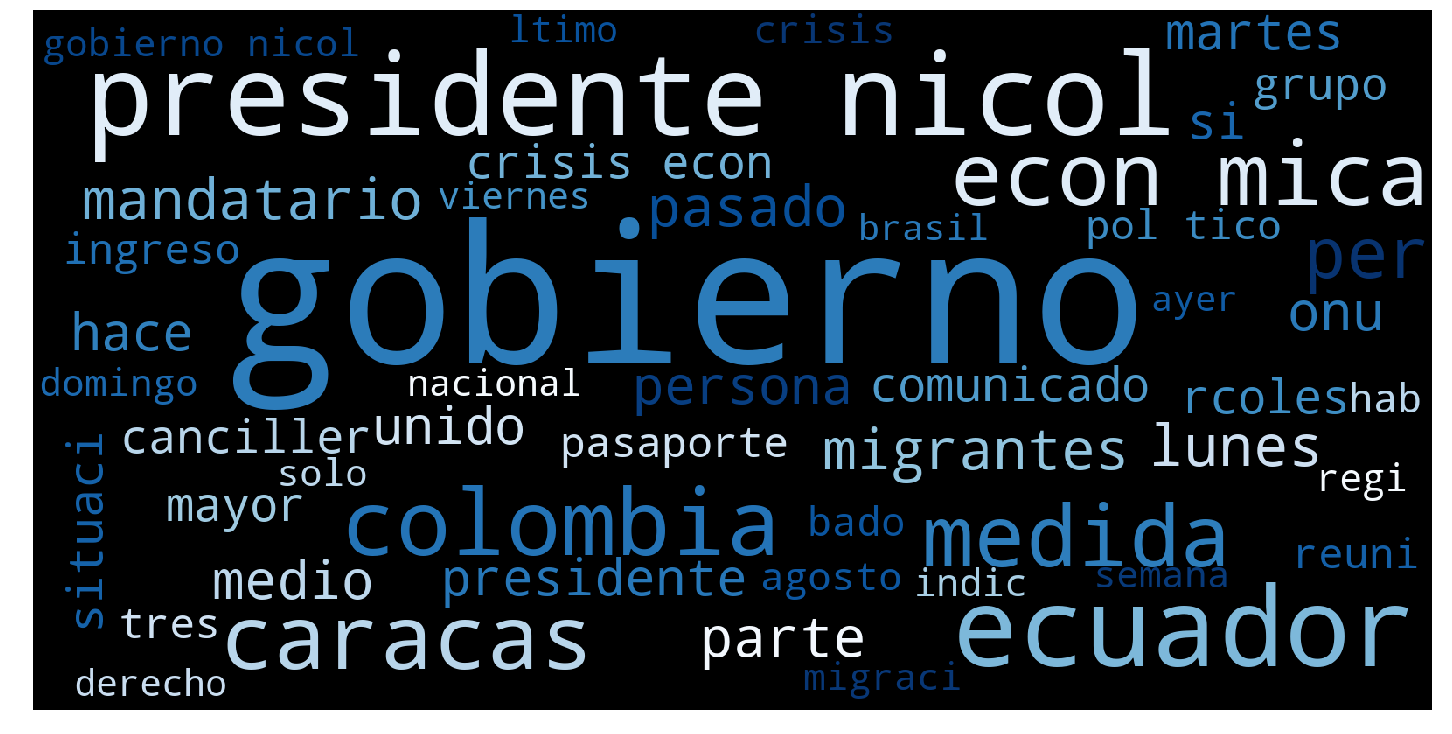

In [150]:
all_words = noticias['noticia_limpia'].tolist()
cleaned_words = []
for i in all_words:
    for j in i:
            cleaned_words.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_words_series = pd.Series(cleaned_words)
words_counts = cleaned_words_series.value_counts()
hashes = cleaned_words_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 50).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()